In [244]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [245]:
df = pd.read_csv('./telescope_data.csv', index_col=0)

In [246]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


## Data Preprocessing

* #### Remove null and na values

In [247]:
df.dropna()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


* #### Extract class column

In [248]:
classes = df['class']
data_matrix = df.drop(columns='class')

In [249]:
classes.head()

0    g
1    g
2    g
3    g
4    g
Name: class, dtype: object

In [250]:
data_matrix.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


## Data Exploration

* #### Create a correlation matrix

In [251]:
correlation_matrix = data_matrix.corr()

In [252]:
correlation_matrix

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1.000000,0.770512,0.702454,-0.630999,-0.598145,-0.368556,-0.119747,0.013389,-0.008777,0.418466
fWidth,0.770512,1.000000,0.717517,-0.609779,-0.581141,-0.266961,-0.176234,0.039744,0.066061,0.336816
fSize,0.702454,0.717517,1.000000,-0.850850,-0.808835,-0.159863,0.095157,0.015455,-0.186675,0.437041
fConc,-0.630999,-0.609779,-0.850850,1.000000,0.976412,0.112272,-0.121899,-0.011294,0.235272,-0.328332
fConc1,-0.598145,-0.581141,-0.808835,0.976412,1.000000,0.100159,-0.118769,-0.010966,0.229799,-0.304625
fAsym,-0.368556,-0.266961,-0.159863,0.112272,0.100159,1.000000,0.274045,0.002553,-0.055689,-0.206730
fM3Long,-0.119747,-0.176234,0.095157,-0.121899,-0.118769,0.274045,1.000000,-0.017197,-0.186275,0.037025
fM3Trans,0.013389,0.039744,0.015455,-0.011294,-0.010966,0.002553,-0.017197,1.000000,0.004659,0.011427
fAlpha,-0.008777,0.066061,-0.186675,0.235272,0.229799,-0.055689,-0.186275,0.004659,1.000000,-0.220556
fDist,0.418466,0.336816,0.437041,-0.328332,-0.304625,-0.206730,0.037025,0.011427,-0.220556,1.000000


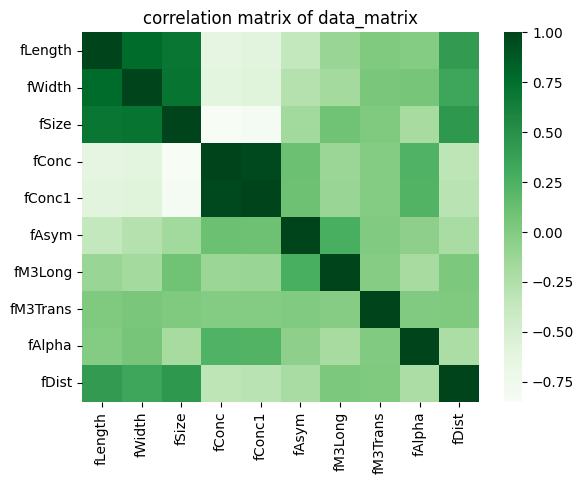

In [253]:
# show correlation matrix as a heatmap
ax = plt.axes()
sns.heatmap(correlation_matrix, cmap='Greens', ax=ax)
ax.set_title('correlation matrix of data_matrix')
plt.show()

* #### Perform eigendecomposition.

In [254]:
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(f'Eigenvalues length: {eigenvalues.size}, Original Number of Features: {data_matrix.shape[1]}')

Eigenvalues length: 10, Original Number of Features: 10


In [255]:
# Order the eigenvalues by ordering the indices of the eigenvalues
indices = eigenvalues.argsort()[::-1]  
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]

print(f'Eigenvalues.shape : {eigenvalues.shape}\nEigenvectors shape : {eigenvectors.shape}')

Eigenvalues.shape : (10,)
Eigenvectors shape : (10, 10)


* #### Find the variance/information percentages for each Eigenvalue 

In [256]:
information_proportions = eigenvalues / eigenvalues.sum()
information_percents = information_proportions * 100

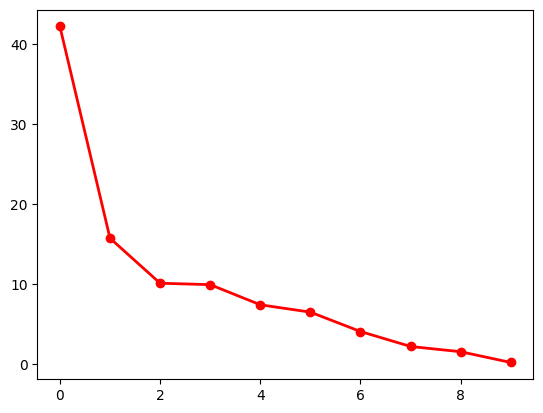

In [257]:
# Plot the principal axes vs the information proportions for each principal axis
plt.figure()
plt.plot(information_percents, 'ro-', linewidth=2)

* #### Find the cumulative variance/information percentages for each Eigenvalue

In [258]:
# Find the cumulative sum of the percentages
cumulative_information_percents = np.cumsum(information_percents)

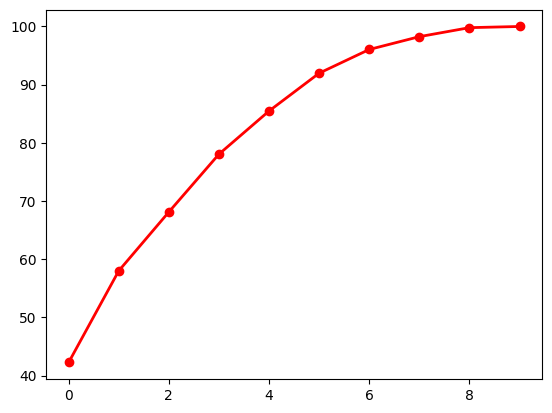

In [259]:
plt.figure()
plt.plot(cumulative_information_percents, 'ro-', linewidth=2)

## Feature Engineeering (Perform PCA)

* #### Standardize the data matrix

In [260]:
# Standardize the data matrix
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd

In [261]:
data_matrix_standardized.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,-0.577211,-0.336795,-0.381120,0.062758,-0.148919,0.541028,0.224812,-0.405831,0.476803,-1.497826
1,-0.510955,-0.570012,-0.648578,0.820362,1.471737,0.516906,0.260357,-0.490081,-0.815397,0.153121
2,2.568210,6.205695,2.615714,-1.875834,-1.773194,2.044938,-1.478497,-2.182972,1.889174,0.842613
3,-0.694749,-0.687241,-1.029451,1.282035,1.606566,0.532757,-0.333506,-0.355350,-0.658786,-1.031436
4,0.516609,0.476371,0.711138,-0.347497,-0.284652,-0.020200,0.353077,1.036593,-0.881016,2.176369


* #### Perform PCA by fitting and transforming the standardized data matrix.

In [262]:
# Calculating principal components with 2 components
pca = PCA(n_components=2) 

In [263]:
principal_components = pca.fit_transform(data_matrix_standardized)

In [264]:
print(f'Number of Principal Components Features: {principal_components.shape[1]}')
print(f'Number of Original Data Features: {data_matrix_standardized.shape[1]}')

Number of Principal Components Features: 2
Number of Original Data Features: 10


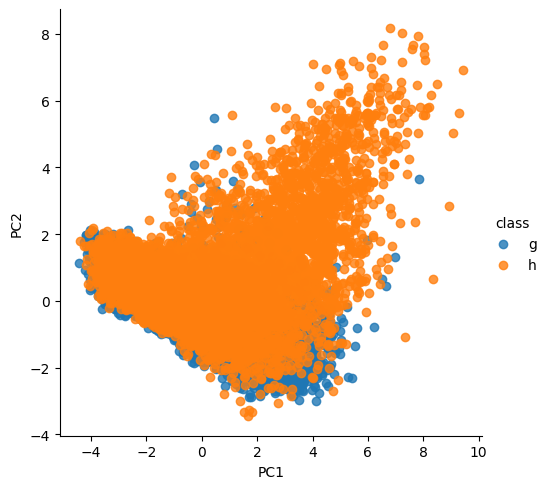

In [265]:
# Plot the principal components as a scatterplot
principal_components_data = pd.DataFrame({
    'PC1': principal_components[:, 0],
    'PC2': principal_components[:, 1],
    'class': classes,
})

sns.lmplot(x='PC1', y='PC2', data=principal_components_data, hue='class', fit_reg=False)
plt.show()

## Build classification model

* #### Create a Linear Support Vector Classifier (Linear SVC) with the PCA features
fit the classifier with the first two features of the original standardized data matrix and generate a score

splitting the data

In [266]:
# Perform PCA using 2 components
pca_1 = PCA(n_components=2) 

In [267]:
# Use the principal components as X
X = pca_1.fit_transform(data_matrix_standardized) 

In [268]:
# Use the one-hot-encoded classes as the y
y = classes.astype('category').cat.codes

In [269]:
# Use the principal components as X and split the data into 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Create the Linear SVC

In [270]:
svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(X_train, y_train)

C:\Users\CHANG\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\CHANG\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

Evaluate Performance (Precision, Recall, F1 Score)

In [271]:
# create confusion matrix to find precision and recall
predicted_y = svc_1.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predicted_y).ravel()
precision_score = tp / (tp + fp)
recall_score = tp / (tp + fn)
f1_score = (2*precision_score*recall_score)/(precision_score+recall_score)

In [272]:
svc1_performance = pd.DataFrame(['with 2 PCA features', precision_score, recall_score, f1_score]).transpose()
svc1_performance.columns = ['Linear SVC', 'Precision Score', 'Recall Score', 'F1 Score']
svc1_performance.set_index('Linear SVC', inplace=True)

In [273]:
svc1_performance

,Precision Score,Recall Score,F1 Score
Linear SVC,,,
with 2 PCA features,0.769585,0.378513,0.507445


* #### Create a Linear SVC with the original data features

splitting the data

In [274]:
first_two_original_features = [0, 1]
X_original = data_matrix_standardized.iloc[:, first_two_original_features]

In [275]:
# Split the data intro 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.33, random_state=42)

Create the Linear SVC

In [281]:
svc_2 = LinearSVC(random_state=0)
svc_2.fit(X_train, y_train)

C:\Users\CHANG\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\CHANG\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0)

Evaluate Performance (Precision, Recall, F1 Score)

In [277]:
# create confusion matrix to find precision and recall
predicted_y = svc_2.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predicted_y).ravel()
precision_score = tp / (tp + fp)
recall_score = tp / (tp + fn)
f1_score = (2*precision_score*recall_score)/(precision_score+recall_score)

In [278]:
svc2_performance = pd.DataFrame(['with 2 original features', precision_score, recall_score, f1_score]).transpose()
svc2_performance.columns = ['Linear SVC', 'Precision Score', 'Recall Score', 'F1 Score']
svc2_performance.set_index('Linear SVC', inplace=True)

In [279]:
svc2_performance

,Precision Score,Recall Score,F1 Score
Linear SVC,,,
with 2 original features,0.792105,0.272892,0.405934


## Model Comparison

In [280]:
compare_model = pd.concat([svc1_performance, svc2_performance], axis=0)
compare_model

,Precision Score,Recall Score,F1 Score
Linear SVC,,,
with 2 PCA features,0.769585,0.378513,0.507445
with 2 original features,0.792105,0.272892,0.405934
